In [1]:
import matplotlib.pyplot as plt
import gromacs as gro
from matplotlib.ticker import MultipleLocator
import pandas as pd
import mdtraj as md
from mdtraj.utils import ensure_type
from mdtraj.utils.unitcell import box_vectors_to_lengths_and_angles
from mdtraj.geometry import _geometry
from mdtraj.geometry.distance import compute_distances, compute_distances_t
import numpy as np
import json

In [2]:
# def compute_distances_core(
#         positions,
#         atom_pairs,
#         unitcell_vectors = None,
#         periodic=True,
#         opt = True,
# ):

#     """Compute the distances between pairs of atoms in each frame.
#     Parameters
#     ----------
#     positions : np.ndarray of shape=(n_frames, n_atoms, 3), dtype=float
#         The positions of all atoms for a given trajectory.
#     atom_pairs : np.ndarray of shape=(num_pairs, 2), dtype=int
#         Each row gives the indices of two atoms involved in the interaction.
#     unitcell_vectors : None or np.ndarray of shape(n_frames, 3 x 3), default=None
#         A numpy array that specifies the box vectors for all frames for a trajectory.
#     periodic : bool, default=True
#         If `periodic` is True and the trajectory contains unitcell
#         information, we will compute distances under the minimum image
#         convention.
#     opt : bool, default=True
#         Use an optimized native library to calculate distances. Our optimized
#         SSE minimum image convention calculation implementation is over 1000x
#         faster than the naive numpy implementation.
#     Returns
#     -------
#     distances : np.ndarray, shape=(n_frames, num_pairs), dtype=float
#         The distance, in each frame, between each pair of atoms.
#     """

#     xyz = ensure_type(positions, dtype=np.float32, ndim=3, name='traj.xyz', shape=(None, None, 3), warn_on_cast=False)
#     pairs = ensure_type(atom_pairs, dtype=np.int32, ndim=2, name='atom_pairs', shape=(None, 2), warn_on_cast=False)
#     if not np.all(np.logical_and(pairs < positions.shape[1], pairs >= 0)):
#         raise ValueError('atom_pairs must be between 0 and %d' % traj.n_atoms)

#     if len(pairs) == 0:
#         return np.zeros((len(xyz), 0), dtype=np.float32)

#     if periodic and (unitcell_vectors is not None):

#         box = ensure_type(
#             unitcell_vectors,
#             dtype=np.float32,
#             ndim=3,
#             name='unitcell_vectors',
#             shape=(len(xyz), 3, 3),
#             warn_on_cast=False,
#         )

#         # convert to angles
#         unitcell_angles = []
#         for fr_unitcell_vectors in unitcell_vectors:
#             _, _, _, alpha, beta, gamma = box_vectors_to_lengths_and_angles(
#                 fr_unitcell_vectors[0],
#                 fr_unitcell_vectors[1],
#                 fr_unitcell_vectors[2],
#             )
#             unitcell_angles.append(np.array([alpha, beta, gamma]))

#         orthogonal = np.allclose(np.array(unitcell_angles), 90)

#         if opt:

#             out = np.empty((xyz.shape[0], pairs.shape[0]), dtype=np.float32)
#             _geometry._dist_mic(xyz, pairs, box.transpose(0, 2, 1).copy(), out, orthogonal)
#             return out

#         else:

#             return _distance_mic(xyz, pairs, box.transpose(0, 2, 1), orthogonal)

#     # either there are no unitcell vectors or they dont want to use them
#     if opt:
#         out = np.empty((xyz.shape[0], pairs.shape[0]), dtype=np.float32)
#         _geometry._dist(xyz, pairs, out)
#         return out
#     else:
#         return _distance(xyz, pairs)

In [3]:
xvg = gro.fileformats.XVG('./rdf_O.xvg')
dataO = xvg.array
dataO.shape

(5, 830)

In [4]:
xvg = gro.fileformats.XVG('./rdf_H.xvg')
dataH = xvg.array
dataH.shape

(5, 830)

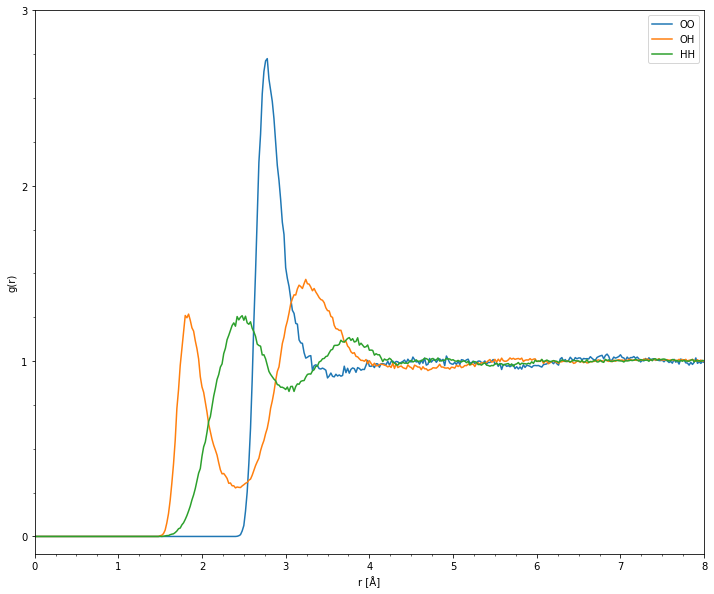

In [5]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.plot(dataO[0,:]*10, dataO[1,:], label='OO')
plt.plot(dataO[0,:]*10, dataO[4,:], label='OH')
plt.plot(dataH[0,:]*10, dataH[4,:], label='HH')

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))

plt.xlim(0,8)
plt.ylim(-0.1,3)
plt.xlabel('r [Å]')
plt.ylabel('g(r)')
plt.legend();

In [6]:
df = pd.read_excel('./atomic_form_factors.xlsx')
df = df.drop(['Unnamed: 1','a1','b1','a2','b2','a3','b3','a4','b4','c','Maximum error', 'Q', 'Mean error'], axis=1)
df = df.rename(columns={'Unnamed: 0' : 'atom'})
df = df.set_index('atom')
df.head()

,f(0)
atom,
H,0.999953
H,0.999872
H1-,1.998454
He,1.999900
Li,2.999500


In [7]:
form_factors = df.to_dict()
form_factors = form_factors['f(0)']

with open("form_factors.json", "w") as outfile:
    json.dump(form_factors, outfile)

form_factors

{'H': 0.9998720000000001,
 'H1-': 1.9984540000000002,
 'He': 1.9998999999999998,
 'Li': 2.9995000000000003,
 'Li1+': 1.9999999999999998,
 'Be': 4.0002,
 'Be2+': 1.9999999999999991,
 'B': 4.998600000000001,
 'C': 5.9992,
 'Cval': 5.999326,
 'N': 6.994599999999998,
 'O': 7.9994000000000005,
 'O1-': 8.99222,
 'F': 8.9993,
 'F1-': 9.997512000000002,
 'Ne': 9.998999999999999,
 'Na': 10.9924,
 'Na1+': 9.9997,
 'Mg': 11.9865,
 'Mg2+': 10.000000000000002,
 'Al': 12.993699999999999,
 'Al3+': 9.999962999999997,
 'Siv': 13.997600000000002,
 'Sival': 13.99906,
 'Si4+': 9.999987,
 'P': 14.9993,
 'S': 15.9998,
 'Cl': 17.000500000000002,
 'Cl1-': 17.9942,
 'Ar': 17.9994,
 'K': 18.999,
 'K1+': 18.002200000000002,
 'Ca': 20.0,
 'Ca2+': 18.002500000000005,
 'Sc': 20.998699999999996,
 'Sc3+': 18.000190000000003,
 'Ti': 21.9972,
 'Ti2+': 20.000324,
 'Ti3+': 18.99881,
 'Ti4+': 18.00034,
 'V': 22.995499999999996,
 'V2+': 21.000600000000002,
 'V3+': 20.00017,
 'V5+': 17.99989,
 'Cr': 23.9937,
 'Cr2+': 21.999

In [8]:
def compute_rdf(traj, pairs, r_range=None, bin_width=0.005, n_bins=None,
                periodic=True, opt=True, scaling_factors=None, avg_form_factor=None, bulk_lims=None,
               unitcell_vectors=None):
    """Compute radial distribution functions for pairs in every frame.
    Parameters
    ----------
    traj : Trajectory
        Trajectory to compute radial distribution function in.
    pairs : array-like, shape=(n_pairs, 2), dtype=int
        Each row gives the indices of two atoms.
    r_range : array-like, shape=(2,), optional, default=(0.0, 1.0)
        Minimum and maximum radii.
    bin_width : float, optional, default=0.005
        Width of the bins in nanometers.
    n_bins : int, optional, default=None
        The number of bins. If specified, this will override the `bin_width`
         parameter.
    periodic : bool, default=True
        If `periodic` is True and the trajectory contains unitcell
        information, we will compute distances under the minimum image
        convention.
    opt : bool, default=True
        Use an optimized native library to compute the pair wise distances.
    Returns
    -------
    r : np.ndarray, shape=(np.diff(r_range) / bin_width - 1), dtype=float
        Radii values corresponding to the centers of the bins.
    g_r : np.ndarray, shape=(np.diff(r_range) / bin_width - 1), dtype=float
        Radial distribution function values at r.
    See also
    --------
    Topology.select_pairs
    """
    if r_range is None:
        r_range = np.array([0.0, 1.0])
    r_range = ensure_type(r_range, dtype=np.float64, ndim=1, name='r_range',
                          shape=(2,), warn_on_cast=False)
    if n_bins is not None:
        n_bins = int(n_bins)
        if n_bins <= 0:
            raise ValueError('`n_bins` must be a positive integer')
    else:
        n_bins = int((r_range[1] - r_range[0]) / bin_width)
    
    if unitcell_vectors is None:    
        distances = compute_distances(traj, pairs, periodic=periodic, opt=opt)
    else:
        distances = compute_distances_core(traj.xyz, pairs, unitcell_vectors=unitcell_vectors,
                                           periodic=periodic,opt=opt)

    if scaling_factors is not None:
        g_r, edges = np.histogram(distances, range=r_range, bins=n_bins, weights=scaling_factors)
    else:
        g_r, edges = np.histogram(distances, range=r_range, bins=n_bins)
    r = 0.5 * (edges[1:] + edges[:-1])
    
    if bulk_lims is not None:
        unitcell_vol = traj.unitcell_volumes * ((bulk_lims[1] - bulk_lims[0]) / traj.unitcell_lengths[:,2])
    else:
        # print('\tDefaulting to scaling by full simulation cell...')
        unitcell_vol = traj.unitcell_volumes

    # Normalize by volume of the spherical shell.
    # See discussion https://github.com/mdtraj/mdtraj/pull/724. There might be
    # a less biased way to accomplish this. The conclusion was that this could
    # be interesting to try, but is likely not hugely consequential. This method
    # of doing the calculations matches the implementation in other packages like
    # AmberTools' cpptraj and gromacs g_rdf.
    V = (4 / 3) * np.pi * (np.power(edges[1:], 3) - np.power(edges[:-1], 3))
    norm = len(pairs) * np.sum(1.0 / unitcell_vol) * V
    g_r = g_r.astype(np.float64) / norm  # From int64.
    return r, g_r

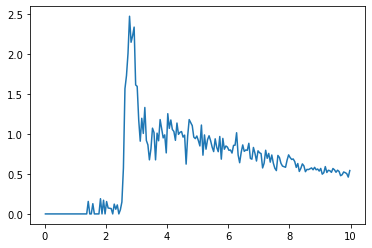

In [9]:
f = 0
gro = './gro_files/output_' + str(f) + '.gro'
t = md.load(gro, top=gro)
top = t.topology

O_idx = [atom.index for atom in top.atoms if atom.element.symbol == 'O']
OO_pairs = []

for i in O_idx:
    for j in O_idx:
        if i != j:
            OO_pairs.append([i,j])

r_OO, g_OO = compute_rdf(t, OO_pairs, periodic=True)
plt.plot(r_OO*10, g_OO, label='Periodic');

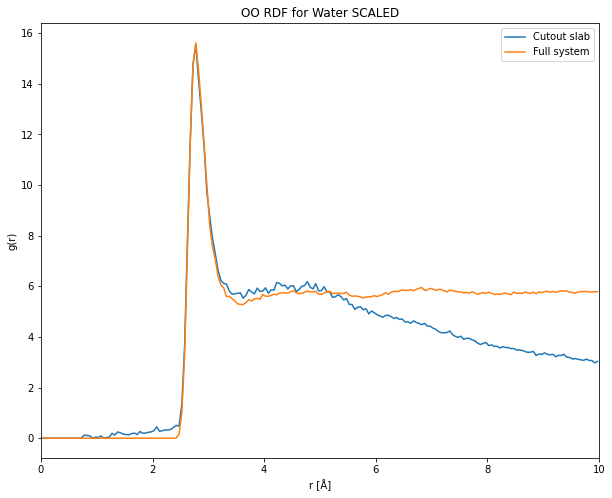

In [12]:
frame_start = 0
frame_end = 51

fig, ax = plt.subplots(1,1, figsize=(10,8))
# ax.yaxis.set_major_locator(MultipleLocator(1))
# ax.yaxis.set_minor_locator(MultipleLocator(0.25))
# ax.xaxis.set_major_locator(MultipleLocator(1))
# ax.xaxis.set_minor_locator(MultipleLocator(0.25))
plt.xlim(0,10)
# plt.ylim(-0.25,3)
plt.xlabel('r [Å]')
plt.ylabel('g(r)')

g_avg = None
for f in np.arange(frame_start, frame_end):
    
    gro = './gro_files/output_' + str(f) + '.gro'
    t = md.load(gro, top=gro)
    top = t.topology
    
    O_idx = [atom.index for atom in top.atoms if atom.element.symbol == 'O']
    OO_pairs = []

    atom_idx = [atom.index for atom in top.atoms]
    np_factors = np.zeros(len(atom_idx))
    for i,idx in enumerate(atom_idx):
        f_i = form_factors[top.atom(idx).element.symbol]
        np_factors[i] = f_i
    
    avg_f = np_factors.mean()
    
    # Find OO pairs and pre-calculate form factors
    scaling = []
    for i in O_idx:
        f_i = form_factors[top.atom(i).element.symbol]
        for j in O_idx:
            if i != j:
                f_j = form_factors[top.atom(j).element.symbol]
                OO_pairs.append([i,j])
                scaling.append(f_i*f_j)
            
    OO_scaling = np.zeros(len(OO_pairs))
    OO_scaling = np.array([scaling]) / avg_f**2
                
    r_OO, g_OO = compute_rdf(t, OO_pairs, scaling_factors=OO_scaling, periodic=True)
    
    if g_avg is not None:
        g_avg += g_OO
        
    else:
        g_avg = g_OO

        
g_avg = g_avg / (frame_end - frame_start)
plt.plot(r_OO*10, g_avg, label='Cutout slab')
# plt.plot(dataO[0,:]*10, dataO[1,:], label='Full system')
plt.plot(r_OO_full*10, g_OO_full, label='Full system')
plt.title('OO RDF for Water SCALED')
plt.legend();

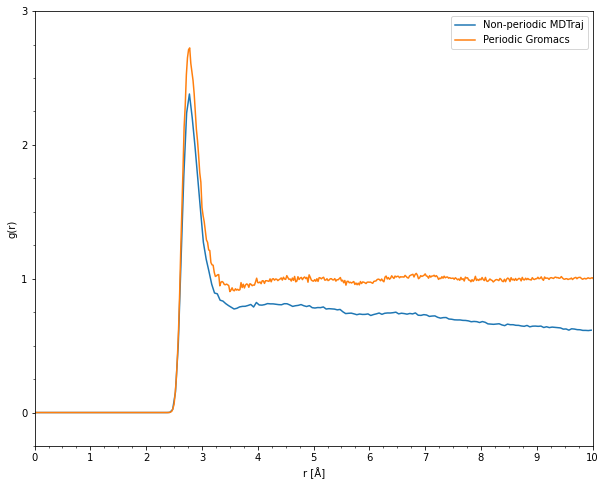

In [19]:
no_scaling = np.ones(OO_scaling.shape)
r_OO, g_OO = compute_rdf(t, OO_pairs, scaling_factors=no_scaling, periodic=False)

fig, ax = plt.subplots(1,1, figsize=(10,8))
plt.plot(r_OO*10, g_OO, label='Non-periodic MDTraj')
plt.plot(dataO[0,:]*10, dataO[1,:], label='Periodic Gromacs')

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))

plt.xlim(0,10)
plt.ylim(-0.25,3)
plt.xlabel('r [Å]')
plt.ylabel('g(r)')
plt.legend();

In [8]:
# def scale_distances(traj, pairs, distances, json_factors='./form_factors.json'):
    
#     form_factors = json.load(open(json_factors))
#     top = traj.topology
    
#     scaled_distances = np.zeros(distances.shape)
#     elements = {}
#     indices = []
#     for p, pair in enumerate(pairs):
#         atom_i = top.atom(pair[0])
#         atom_j = top.atom(pair[1])
        
#         element_i = atom_i.element.symbol
#         element_j = atom_j.element.symbol
        
#         f_i = form_factors[element_i]
#         f_j = form_factors[element_j]
        
#         scaled_distances[:,p] = distances[:,p]*f_i*f_j
        
#         if element_i not in elements and pair[0] not in indices:
#             elements[element_i] = 1
#             indices.append(pair[0])
#         elif pair[0] not in indices:
#             elements[element_i] += 1
#             indices.append(pair[0])
#         if element_j not in elements and pair[1] not in indices:
#             elements[element_j] = 1
#             indices.append(pair[1])
#         elif pair[1] not in indices:
#             elements[element_j] += 1
#             indices.append(pair[1])
                        
#     avg_f = 0
#     tot_elem = 0
#     for element in elements:
#         avg_f += elements[element]*form_factors[element]
#         tot_elem += elements[element]

#     avg_f = avg_f / tot_elem
#     scaled_distances = scaled_distances / avg_f**2
#     print('\tAverage form factor:', avg_f)
        
#     return scaled_distances


# def scale_distances_noAvg(traj, pairs, distances, json_factors='./form_factors.json'):
    
#     form_factors = json.load(open(json_factors))
#     top = traj.topology
    
#     scaled_distances = np.zeros(distances.shape)
#     for p, pair in enumerate(pairs):
#         atom_i = top.atom(pair[0])
#         atom_j = top.atom(pair[1])
        
#         element_i = atom_i.element.symbol
#         element_j = atom_j.element.symbol
        
#         f_i = form_factors[element_i]
#         f_j = form_factors[element_j]
        
#         scaled_distances[:,p] = distances[:,p]*f_i*f_j
        
#     return scaled_distances

Average form factor:  3.3330480000000016


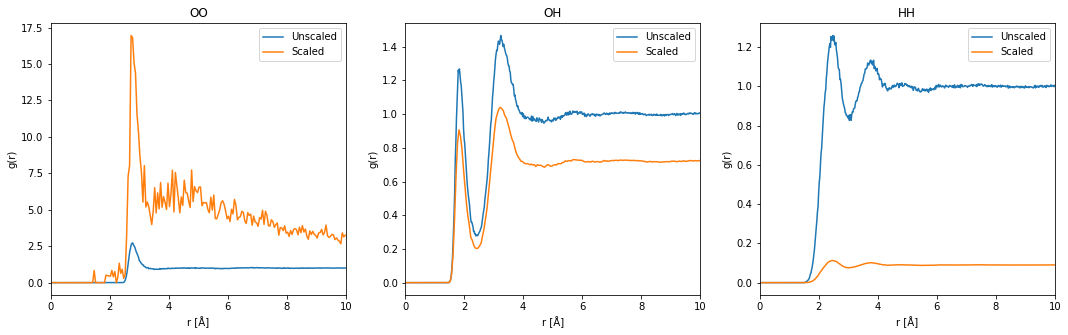

In [11]:
# Testing scaling with pre-calculated factors
t = md.load('../npt.xtc', top='../npt.gro')
top = t.topology

O_idx = [atom.index for atom in top.atoms if atom.element.symbol == 'O']
H_idx = [atom.index for atom in top.atoms if atom.element.symbol == 'H']

OO_pairs = []
OH_pairs = []
HH_pairs = []

atom_idx = [atom.index for atom in top.atoms]
np_factors = np.zeros(len(atom_idx))
for i,idx in enumerate(atom_idx):
    f_i = form_factors[top.atom(idx).element.symbol]
    np_factors[i] = f_i
    
avg_f = np_factors.mean()
    
# Find OO pairs and pre-calculate form factors
scaling = []
for i in O_idx:
    f_i = form_factors[top.atom(i).element.symbol]
    for j in O_idx:
        if i != j:
            f_j = form_factors[top.atom(j).element.symbol]
            OO_pairs.append([i,j])
            scaling.append(f_i*f_j)
            
OO_scaling = np.zeros((t.n_frames, len(OO_pairs)))
for f in range(t.n_frames):
    OO_scaling[f,:] = np.array(scaling) / avg_f**2
            
# Find OH pairs and pre-calculate form factors
scaling = []
for i in O_idx:
    f_i = form_factors[top.atom(i).element.symbol]
    for j in H_idx:
        if top.atom(i).residue != top.atom(j).residue:
            f_j = form_factors[top.atom(j).element.symbol]
            OH_pairs.append([i,j])
            scaling.append(f_i*f_j)
            
OH_scaling = np.zeros((t.n_frames, len(OH_pairs)))
for f in range(t.n_frames):
    OH_scaling[f,:] = np.array(scaling) / avg_f**2

# Find HH pairs, calculate average HH form factor, and pre-calculate form factors
scaling = []
for i in H_idx:
    f_i = form_factors[top.atom(i).element.symbol]
    for j in H_idx:
        if i != j and top.atom(i).residue != top.atom(j).residue:
            f_j = form_factors[top.atom(j).element.symbol]
            HH_pairs.append([i,j])
            scaling.append(f_i*f_j)
            
HH_scaling = np.zeros((t.n_frames, len(HH_pairs)))
for f in range(t.n_frames):
    HH_scaling[f,:] = np.array(scaling) / avg_f**2


# Compute RDFs
print('Average form factor: ', avg_f)
r_OO_full, g_OO_full = compute_rdf(t, OO_pairs, scaling_factors=OO_scaling)
r_OH, g_OH = compute_rdf(t, OH_pairs, scaling_factors=OH_scaling)
r_HH, g_HH = compute_rdf(t, HH_pairs, scaling_factors=HH_scaling)

# Plotting
fig, ax = plt.subplots(1,3, figsize=(18,5))

ax[0].set_title('OO')
ax[0].plot(dataO[0,:]*10, dataO[1,:], label='Unscaled')
ax[0].plot(r_OO*10, g_OO, label='Scaled')

ax[1].set_title('OH')
ax[1].plot(dataO[0,:]*10, dataO[4,:], label='Unscaled')
ax[1].plot(r_OH*10, g_OH, label='Scaled')

ax[2].set_title('HH')
ax[2].plot(dataH[0,:]*10, dataH[4,:], label='Unscaled')
ax[2].plot(r_HH*10, g_HH, label='Scaled')
                
for i in range(3):
    ax[i].set_xlim(0,10)
    ax[i].set_xlabel('r [Å]')
    ax[i].set_ylabel('g(r)')
    ax[i].legend();

In [11]:
# # Testing with precalculating average form factor only
# t = md.load('../npt.xtc', top='../npt.gro')
# top = t.topology

# O_idx = [atom.index for atom in top.atoms if atom.element.symbol == 'O']
# H_idx = [atom.index for atom in top.atoms if atom.element.symbol == 'H']

# OO_pairs = []
# OH_pairs = []
# HH_pairs = []

# # Find OO pairs and calculate average OO form factor
# OO_avg_f = 0
# count = 0
# for i in O_idx:
#     f_i = form_factors[top.atom(i).element.symbol]
#     OO_avg_f += f_i
#     count += 1
#     for j in O_idx:
#         if i != j:
#             OO_pairs.append([i,j])
            
# OO_avg_f = OO_avg_f / count

# # Find OH pairs
# for i in O_idx:
#     for j in H_idx:
#         if top.atom(i).residue != top.atom(j).residue:
#             OH_pairs.append([i,j])
            
# # Calculate average OH form factor
# OH_avg_f = 0
# count = 0
# for i in O_idx:
#     f_i = form_factors[top.atom(i).element.symbol]
#     OH_avg_f += f_i
#     count += 1
    
# for j in H_idx:
#     f_j = form_factors[top.atom(j).element.symbol]
#     OH_avg_f += f_j
#     count += 1

# OH_avg_f = OH_avg_f / count

# # Find HH pairs and calculate average HH form factor
# HH_avg_f = 0
# count = 0
# for i in H_idx:
#     f_i = form_factors[top.atom(i).element.symbol]
#     HH_avg_f += f_i
#     count += 1
#     for j in H_idx:
#         if i != j and top.atom(i).residue != top.atom(j).residue:
#             HH_pairs.append([i,j])
            
# HH_avg_f = HH_avg_f / count

            
# # Compute RDFs
# r_OO, g_OO = compute_rdf(t, OO_pairs, avg_form_factor=OO_avg_f)
# r_OH, g_OH = compute_rdf(t, OH_pairs, avg_form_factor=OH_avg_f)
# r_HH, g_HH = compute_rdf(t, HH_pairs, avg_form_factor=HH_avg_f)


# # Plotting
# fig, ax = plt.subplots(1,3, figsize=(18,5))

# ax[0].set_title('OO')
# ax[0].plot(dataO[0,:]*10, dataO[1,:], label='Unscaled')
# ax[0].plot(r_OO*10, g_OO, label='Scaled')

# ax[1].set_title('OH')
# ax[1].plot(dataO[0,:]*10, dataO[4,:], label='Unscaled')
# ax[1].plot(r_OH*10, g_OH, label='Scaled')

# ax[2].set_title('HH')
# ax[2].plot(dataH[0,:]*10, dataH[4,:], label='Unscaled')
# ax[2].plot(r_HH*10, g_HH, label='Scaled')
                
# for i in range(3):
#     ax[i].set_xlim(0,10)
#     ax[i].set_xlabel('r [Å]')
#     ax[i].set_ylabel('g(r)')
#     ax[i].legend();

In [12]:
# # Original correct scaling (WARNING: SLOW)
# t = md.load('../npt.xtc', top='../npt.gro')
# top = t.topology

# O_idx = [atom.index for atom in top.atoms if atom.element.symbol == 'O']
# H_idx = [atom.index for atom in top.atoms if atom.element.symbol == 'H']

# OO_pairs = []
# OH_pairs = []
# HH_pairs = []

# for i in O_idx:
#     for j in O_idx:
#         if i != j:
#             OO_pairs.append([i,j])

# for i in O_idx:
#     for j in H_idx:
#         if top.atom(i).residue != top.atom(j).residue:
#             OH_pairs.append([i,j])

# for i in H_idx:
#     for j in H_idx:
#         if i != j and top.atom(i).residue != top.atom(j).residue:
#             HH_pairs.append([i,j])

# r_OO, g_OO = compute_rdf(t, OO_pairs)
# r_OH, g_OH = compute_rdf(t, OH_pairs)
# r_HH, g_HH = compute_rdf(t, HH_pairs)


# fig, ax = plt.subplots(1,3, figsize=(18,5))

# ax[0].set_title('OO')
# ax[0].plot(dataO[0,:]*10, dataO[1,:], label='Unscaled')
# ax[0].plot(r_OO*10, g_OO, label='Scaled')

# ax[1].set_title('OH')
# ax[1].plot(dataO[0,:]*10, dataO[4,:], label='Unscaled')
# ax[1].plot(r_OH*10, g_OH, label='Scaled')

# ax[2].set_title('HH')
# ax[2].plot(dataH[0,:]*10, dataH[4,:], label='Unscaled')
# ax[2].plot(r_HH*10, g_HH, label='Scaled')
                
# for i in range(3):
#     ax[i].set_xlim(0,10)
#     ax[i].set_xlabel('r [Å]')
#     ax[i].set_ylabel('g(r)')
#     ax[i].legend();

Average form factor: 3.3330480000000016

--------------------------- TIMING BREAKDOWN ---------------------------
	Finding pairs and calculating scaling factors:	70.476643
	Computing RDFs: 				19.130362

	Total time: 					89.607004
--------------------------------------------------------------------


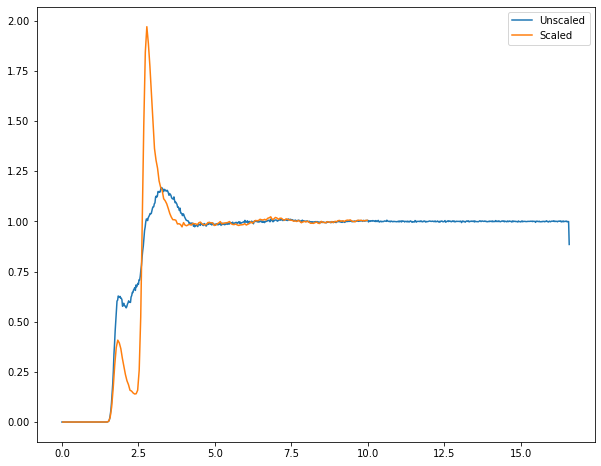

In [31]:
# Time it
from time import time
start = time()

# Put it all together for a system RDF with pre-calculated scaling factors (the fastest!)
atom_idx = [atom.index for atom in top.atoms]
np_factors = np.zeros(len(atom_idx))
for i,idx in enumerate(atom_idx):
    f_i = form_factors[top.atom(idx).element.symbol]
    np_factors[i] = f_i
    
avg_f = np_factors.mean()
avg_f_time = time()

pairs = []
scaling = []

for i in atom_idx:
    f_i = form_factors[top.atom(i).element.symbol]
    for j in atom_idx:
        if i != j and top.atom(i).residue != top.atom(j).residue:
            f_j = form_factors[top.atom(j).element.symbol]
            pairs.append([i,j])
            scaling.append(f_i*f_j)
            
scaling_factors = np.zeros((t.n_frames, len(pairs)))
for f in range(t.n_frames):
    scaling_factors[f,:] = np.array(scaling) / avg_f**2
    
print('Average form factor:', avg_f)
find_pairs = time()

r, g_r = compute_rdf(t, pairs, scaling_factors=scaling_factors)
rdf_comp = time()

print()
print('-'*27 + ' TIMING BREAKDOWN ' + '-'*27)
print('\tCalculating the average form factor:\t%f' %(avg_f_time - start) )
print('\tFinding pairs and calculating scaling factors:\t%f' %(find_pairs - avg_f_time) )
print('\tComputing RDFs: \t\t\t\t%f' %(rdf_comp - find_pairs) )
print('\n\tTotal time: \t\t\t\t\t%f' %(rdf_comp - start) )
print('-'*68)

xvg = gro.fileformats.XVG('./rdf.xvg')
data = xvg.array

fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.plot(data[0,:]*10, data[1,:], label='Unscaled')
ax.plot(r*10, g_r, label='Scaled')
ax.legend();